In [1]:
# 1. Importing libraries and dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from tabulate import tabulate



# from pandas import read_csv
# from matplotlib import pyplot
# from sklearn.linear_model import LogisticRegression

# Our project is a binary classification problem

In [2]:
# Importing dataset
# names = ['age', 'sex', 'chest_pain', 'rest_blood_press', 'ser_cholest', 'fast_blood_sug', 'restecg', 'thalach', 'exercise_ang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# age: age of the patient
# sex: sex of the patient
# cp: chest pain type (4 values)
# restbps: resting blood pressure
# chol: serum cholestoral in mg/dl
# fbs: fasting blood sugar > 120 mg/dl
# restecg: resting electrocardiographic results (values 0,1,2)
# thalach: maximum heart rate achieved
# exercise_ang: exercise induced angina
# oldpeak: ST depression induced by exercise relative to rest
# slope: the slope of the peak exercise ST segment
# ca: number of major vessels (0-3) colored by flourosopy
# thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
# target: presence of heart disease in the patient

# Here, 0 = no disease and 1 = disease.

data = pd.read_csv('heart.csv')

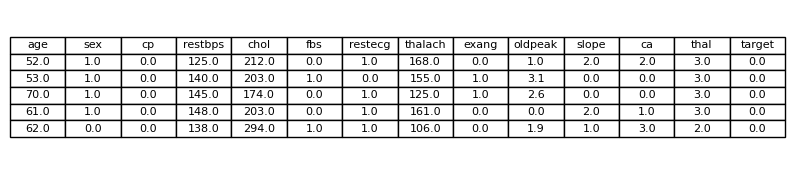

In [3]:
# Peek dataset by selecting the first 5 rows

peek = data.head(5)

plt.figure(figsize=(10, 2))
plt.table(cellText=peek.values, colLabels=peek.columns, loc='center', cellLoc='center', fontsize=12)
plt.axis('off')  # Turn off axis
plt.show()

In [4]:
# shape = data.shape
# print(shape)

shape = data.shape
print('\033[1m' + 'Dataset Info ' + '\033[0m')
print('*' * 30)
print(f"Total Rows: \033[1m{shape[0]}")
print(f"\033[0mTotal Columns: \033[1m{shape[1]}")
print('\033[0m' + '*' * 30)

Dataset Info 
******************************
Total Rows: 1025
Total Columns: 14
******************************


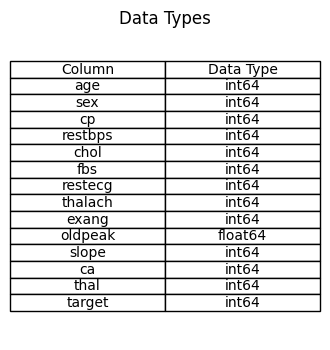

In [5]:
types = data.dtypes

plt.figure(figsize=(4, 4))
plt.table(cellText=types.reset_index().values,
          colLabels=['Column', 'Data Type'],
          loc='center', cellLoc='center', fontsize=10)
plt.axis('off')  # Turn off axis
plt.title('Data Types')
plt.show()

In [6]:
# 2. Initial Data Exploration
# In the dataset, there are 14 columns with 1025 rows. 
# Also, there are no null values in the dataset. The datatype ofmeach variable can be seen above. 
# The data types for oldpeak column is not the same and we will match it with the rest before analysing the data

*************************
.: Gender Total :.
*************************


sex
1    713
0    312
Name: count, dtype: int64

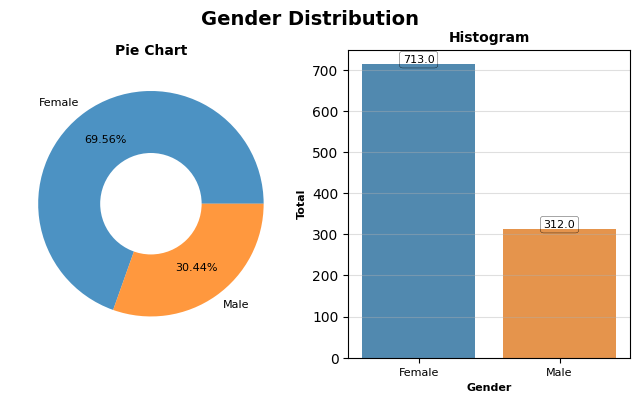

In [7]:
# --- Setting Colors, Labels, Order ---
gender_labels = ['Female', 'Male']
gender_order = data['sex'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(8, 4))
plt.suptitle('Gender Distribution', fontweight='heavy', 
             fontsize=14, fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=10,
          fontfamily='sans-serif')
plt.pie(data['sex'].value_counts(), labels=gender_labels, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize': 8})
centre = plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=10, 
          fontfamily='sans-serif')
ax = sns.countplot(x='sex', data=data, order=gender_order, alpha=0.85)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, 
            rect.get_height() + 4.25, rect.get_height(),
            horizontalalignment='center', fontsize=8, 
            bbox=dict(facecolor='none', linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender', fontweight='bold', fontsize=8, fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=8, fontfamily='sans-serif')
plt.xticks([0, 1], gender_labels, fontsize=8)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels without Dropping Null Values ---
print('*' * 25)
print('\033[1m' + '.: Gender Total :.' + '\033[0m')
print('*' * 25)
data.sex.value_counts(dropna=False)

******************************
.: Chest Pain Type Total :.
******************************


cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

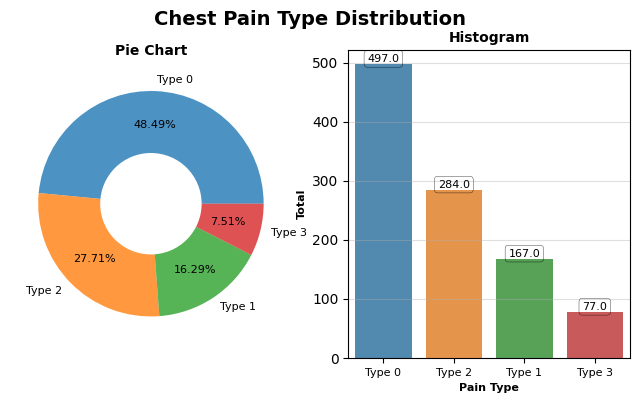

In [8]:
# # --- Chest Pain Type ---
# # Chest Pain Type

# --- Setting Labels, Order ---
pain_labels = ['Type 0', 'Type 2', 'Type 1', 'Type 3']
pain_order = data['cp'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(8, 4))
plt.suptitle('Chest Pain Type Distribution', fontweight='heavy', fontsize=14, 
             fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=10, fontfamily='sans-serif', 
          )
plt.pie(data['cp'].value_counts(), labels=pain_labels, pctdistance=0.7, 
        autopct='%.2f%%', textprops={'fontsize': 8},
        wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=10, fontfamily='sans-serif')
ax = sns.countplot(x='cp', data=data, order=pain_order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=8,
             bbox=dict(facecolor='none', linewidth=0.25, boxstyle='round'))

plt.xlabel('Pain Type', fontweight='bold', fontsize=8, fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=8, fontfamily='sans-serif')
plt.xticks([0, 1, 2, 3], pain_labels, fontsize=8)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+'.: Chest Pain Type Total :.'+'\033[0m')
print('*' * 30)
data.cp.value_counts(dropna=False)


********************************
.: Fasting Blood Sugar Total :.
********************************


fbs
0    872
1    153
Name: count, dtype: int64

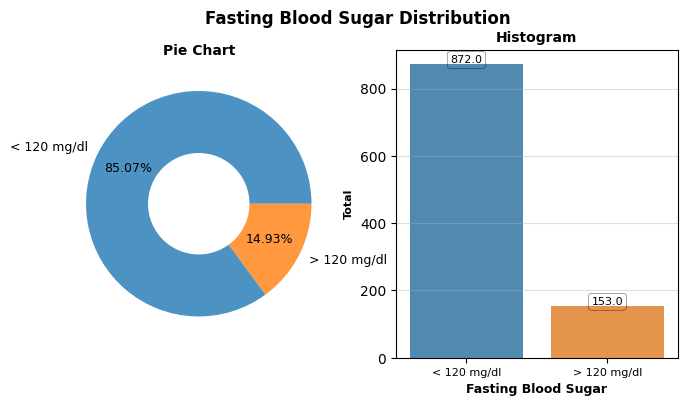

In [9]:
# --- Setting Colors, Labels, Order ---

sugar_labels = ['< 120 mg/dl', '> 120 mg/dl']
sugar_order = data['fbs'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(8, 4))
plt.suptitle('Fasting Blood Sugar Distribution', fontweight='heavy', 
             fontsize=12, fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=10, fontfamily='sans-serif', 
          )
plt.pie(data['fbs'].value_counts(), labels=sugar_labels, wedgeprops=dict(alpha=0.8), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':9})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=10, fontfamily='sans-serif')
ax = sns.countplot(x='fbs', data=data, order=sugar_order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=8,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Fasting Blood Sugar', fontweight='bold', fontsize=9, 
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=8, fontfamily='sans-serif')
plt.xticks([0, 1], sugar_labels, fontsize=8)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 32)
print('\033[1m'+'.: Fasting Blood Sugar Total :.'+'\033[0m')
print('*' * 32)
data.fbs.value_counts(dropna=False)


**************************************************
Resting Electrocardiographic Results Total :.
**************************************************


restecg
1    513
0    497
2     15
Name: count, dtype: int64

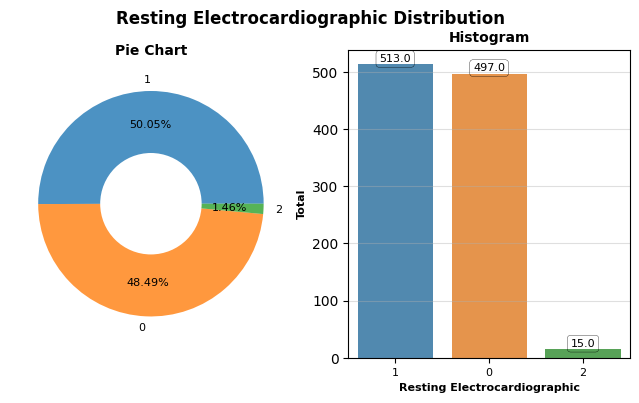

In [10]:
# --- Setting Colors, Labels, Order ---

labels=['1', '0', '2']
order=data['restecg'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(8,4))
plt.suptitle('Resting Electrocardiographic Distribution', fontweight='heavy', 
             fontsize=12, fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=10, fontfamily='sans-serif')
plt.pie(data['restecg'].value_counts(), labels=labels,
        wedgeprops=dict(alpha=0.8), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':8})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=10, fontfamily='sans-serif', 
          )
ax = sns.countplot(x='restecg', data=data,  order=order,
                    alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=8,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Resting Electrocardiographic', fontweight='bold', fontsize=8, 
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=8, fontfamily='sans-serif')
plt.xticks([0, 1, 2], labels, fontsize=8)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 50)
print('\033[1m'+'Resting Electrocardiographic Results Total :.'+'\033[0m')
print('*' * 50)
data.restecg.value_counts(dropna=False)

*********************************************
Heart Diseases Status (target) Total :.
*********************************************


target
1    526
0    499
Name: count, dtype: int64

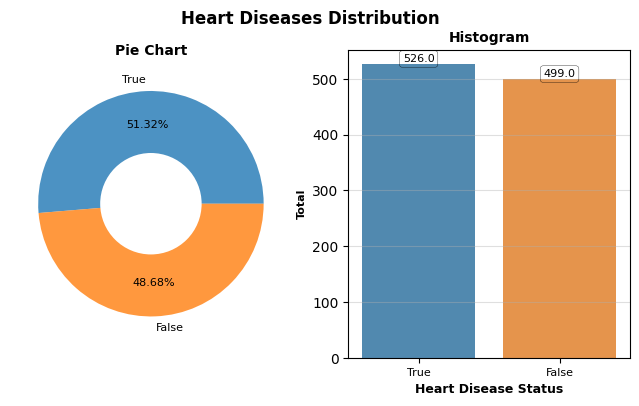

In [11]:
# --- Setting Colors, Labels, Order ---

disease_labels = ['True', 'False']
disease_order = data['target'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(8, 4))
plt.suptitle('Heart Diseases Distribution', fontweight='heavy', 
             fontsize=12, fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=10, fontfamily='sans-serif',
          )
plt.pie(data['target'].value_counts(), labels=disease_labels, 
        wedgeprops=dict(alpha=0.8), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':8})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=10, fontfamily='sans-serif')
ax = sns.countplot(x='target', data=data, order=disease_order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=8,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Heart Disease Status', fontweight='bold', fontsize=9, 
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=8, fontfamily='sans-serif')
plt.xticks([0, 1], disease_labels, fontsize=8)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 45)
print('\033[1m'+'Heart Diseases Status (target) Total :.'+'\033[0m')
print('*' * 45)
data.target.value_counts(dropna=False)


In [12]:
# Descriptive Statistics of numerical features

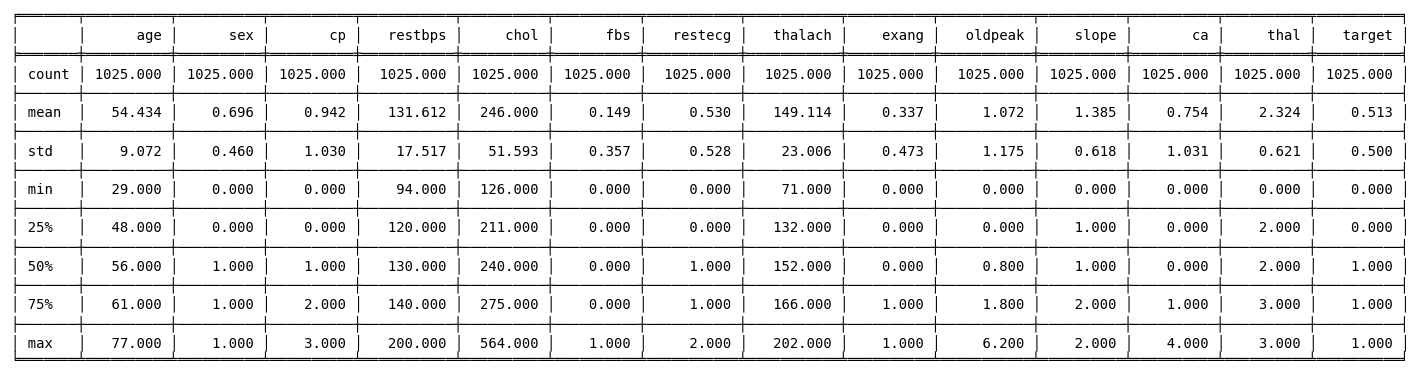

In [13]:
# Set display options
pd.set_option('display.width', 100)

# Describe the data
desc = data.describe()

# Convert description to a formatted table
table_str = tabulate(desc, headers='keys', tablefmt='fancy_grid', floatfmt=".3f")

# Plot figure
plt.figure(figsize=(.1, .1))
plt.text(0.1, 0.5, table_str, fontsize=10, fontfamily='monospace')
plt.axis('off')  # Remove axis
plt.show()

.: Age Column Skewness & Kurtosis :.
****************************************
Skewness: -0.249
Kurtosis: -0.529



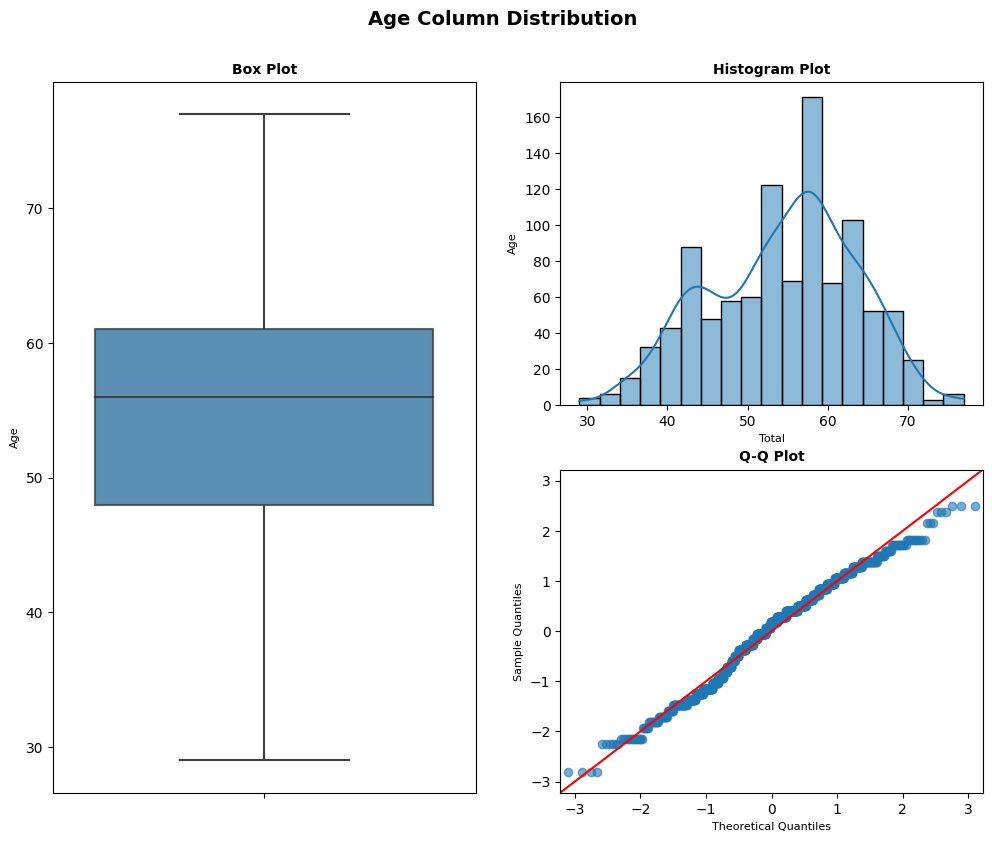

In [14]:
# Selected variable and color
selected_variable = 'age'

# Compute skewness and kurtosis
var_skewness = skew(data[selected_variable])
var_kurtosis = kurtosis(data[selected_variable])

# Print skewness and kurtosis
print('\033[1m'+'.: Age Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print(f'Skewness: \033[1m{var_skewness:.3f}')
print('\033[0m' + f'Kurtosis: \033[1m{var_kurtosis:.3f}\n')

# Create figure
fig = plt.figure(figsize=(12, 9))
fig.suptitle('Age Column Distribution', fontweight='bold', fontsize=14, fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# Histogram plot
ax_hist = fig.add_subplot(2, 2, 2)
ax_hist.set_title('Histogram Plot', fontweight='bold', fontsize=10, fontfamily='sans-serif')
sns.histplot(data=data, x=selected_variable, kde=True, ax=ax_hist)
ax_hist.set_xlabel('Total', fontweight='regular', fontsize=8, fontfamily='sans-serif')
ax_hist.set_ylabel('Age', fontweight='regular', fontsize=8, fontfamily='sans-serif')

# Q-Q plot
ax_qq = fig.add_subplot(2, 2, 4)
ax_qq.set_title('Q-Q Plot', fontweight='bold', fontsize=10, fontfamily='sans-serif')
qqplot(data[selected_variable], fit=True, line='45', ax=ax_qq, alpha=0.6)
ax_qq.set_xlabel('Theoretical Quantiles', fontweight='regular', fontsize=8, fontfamily='sans-serif')
ax_qq.set_ylabel('Sample Quantiles', fontweight='regular', fontsize=8, fontfamily='sans-serif')

# Box plot
ax_box = fig.add_subplot(1, 2, 1)
ax_box.set_title('Box Plot', fontweight='bold', fontsize=10, fontfamily='sans-serif')
sns.boxplot(data=data, y=selected_variable, boxprops=dict(alpha=0.8), linewidth=1.5, ax=ax_box)
ax_box.set_ylabel('Age', fontweight='regular', fontsize=8, fontfamily='sans-serif')

plt.show()


.: Resting Blood Pressure Column Skewness & Kurtosis :.
*******************************************************
Skewness: 0.740
Kurtosis: 0.991



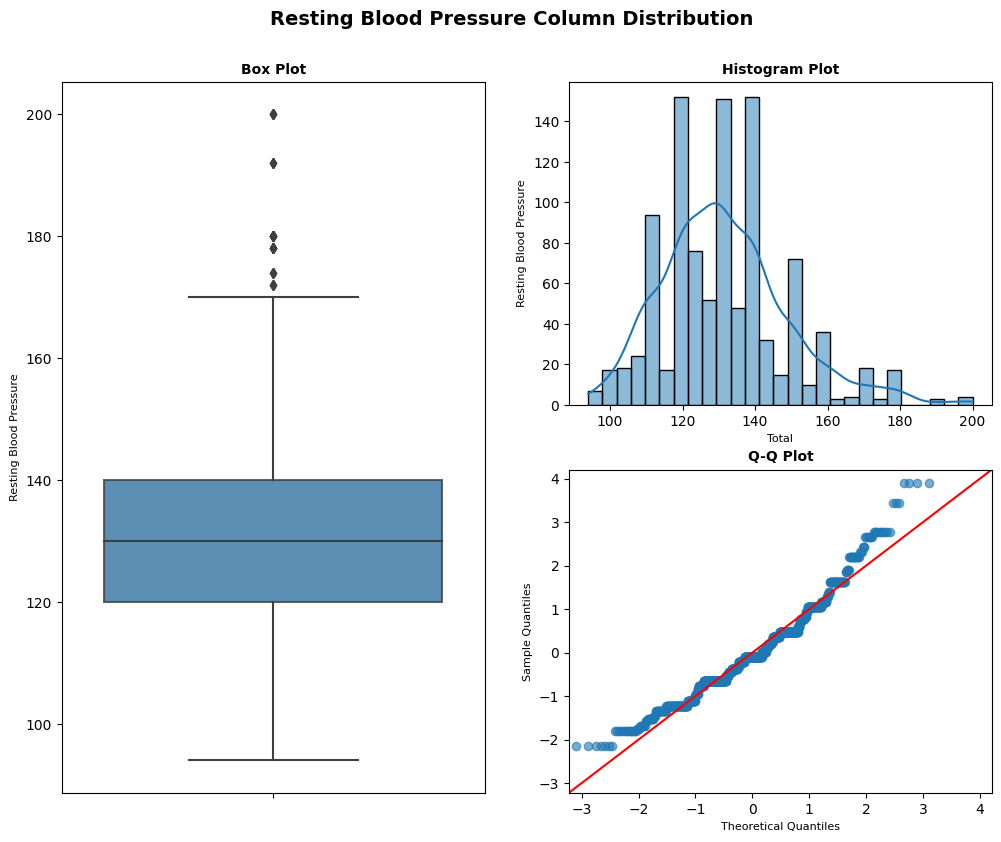

In [15]:
# Selected variable and color
selected_variable = 'restbps'

# Compute skewness and kurtosis
var_skewness = data[selected_variable].skew(axis=0, skipna=True)
var_kurtosis = data[selected_variable].kurt(axis=0, skipna=True)

# Print skewness and kurtosis
print('\033[1m'+'.: Resting Blood Pressure Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 55)
print(f'Skewness: \033[1m{var_skewness:.3f}')
print('\033[0m' + f'Kurtosis: \033[1m{var_kurtosis:.3f}\n')

# Create figure
fig = plt.figure(figsize=(12, 9))
fig.suptitle('Resting Blood Pressure Column Distribution', fontweight='bold', fontsize=14, fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# Histogram plot
ax_hist = fig.add_subplot(2, 2, 2)
ax_hist.set_title('Histogram Plot', fontweight='bold', fontsize=10, fontfamily='sans-serif')
sns.histplot(data=data, x=selected_variable, kde=True, ax=ax_hist)
ax_hist.set_xlabel('Total', fontweight='regular', fontsize=8, fontfamily='sans-serif')
ax_hist.set_ylabel('Resting Blood Pressure', fontweight='regular', fontsize=8, fontfamily='sans-serif')

# Q-Q plot
ax_qq = fig.add_subplot(2, 2, 4)
ax_qq.set_title('Q-Q Plot', fontweight='bold', fontsize=10, fontfamily='sans-serif')
qqplot(data[selected_variable], fit=True, line='45', ax=ax_qq, alpha=0.6)
ax_qq.set_xlabel('Theoretical Quantiles', fontweight='regular', fontsize=8, fontfamily='sans-serif')
ax_qq.set_ylabel('Sample Quantiles', fontweight='regular', fontsize=8, fontfamily='sans-serif')

# Box plot
ax_box = fig.add_subplot(1, 2, 1)
ax_box.set_title('Box Plot', fontweight='bold', fontsize=10, fontfamily='sans-serif')
sns.boxplot(data=data, y=selected_variable, boxprops=dict(alpha=0.8), linewidth=1.5, ax=ax_box)
ax_box.set_ylabel('Resting Blood Pressure', fontweight='regular', fontsize=8, fontfamily='sans-serif')

plt.show()

.: Serum Cholestoral Column Skewness & Kurtosis :.
*********************************************
Skewness: 1.074
Kurtosis: 3.997



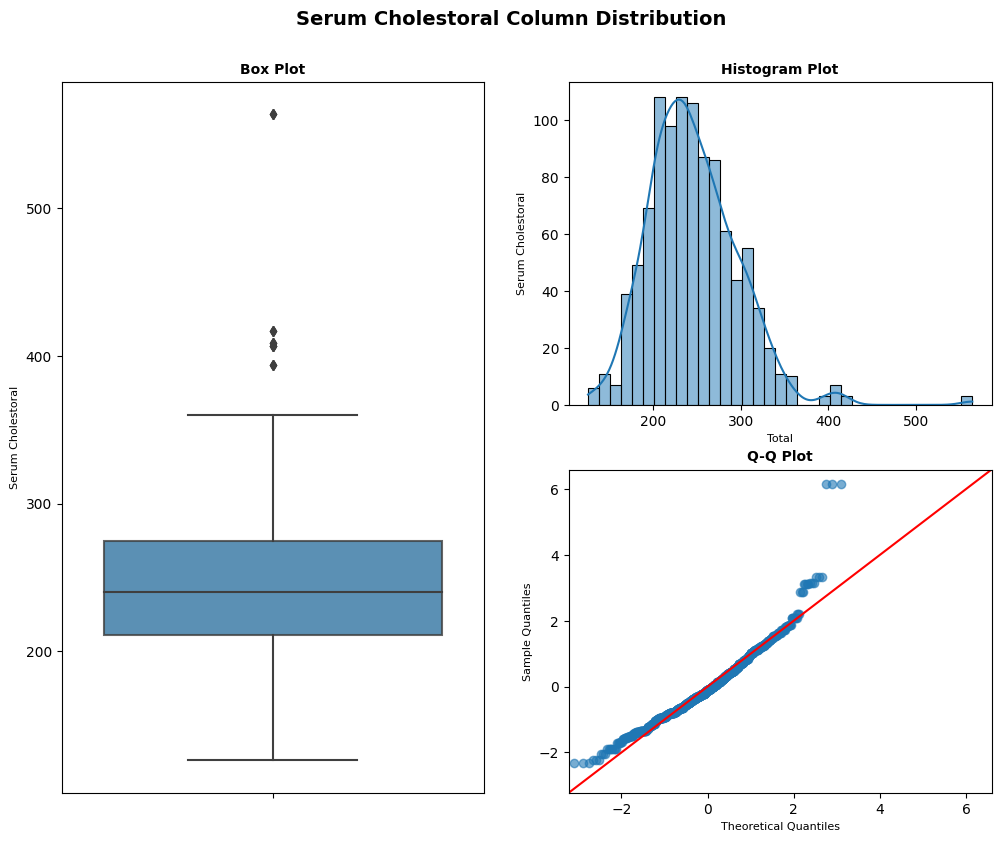

In [16]:
# Selected variable
selected_variable = 'chol'

# Compute skewness and kurtosis
var_skewness = data[selected_variable].skew(axis=0, skipna=True)
var_kurtosis = data[selected_variable].kurt(axis=0, skipna=True)

# Print skewness and kurtosis
print('\033[1m'+'.: Serum Cholestoral Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 45)
print(f'Skewness: \033[1m{var_skewness:.3f}')
print('\033[0m' + f'Kurtosis: \033[1m{var_kurtosis:.3f}\n')

# Create figure
fig = plt.figure(figsize=(12, 9))
fig.suptitle('Serum Cholestoral Column Distribution', fontweight='bold', 
             fontsize=14, fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# Histogram plot
ax_hist = fig.add_subplot(2, 2, 2)
ax_hist.set_title('Histogram Plot', fontweight='bold', fontsize=10, 
                  fontfamily='sans-serif')
sns.histplot(data=data, x=selected_variable, kde=True, ax=ax_hist)
ax_hist.set_xlabel('Total', fontweight='regular', fontsize=8, 
                   fontfamily='sans-serif')
ax_hist.set_ylabel('Serum Cholestoral', fontweight='regular', fontsize=8, 
                   fontfamily='sans-serif')

# Q-Q plot
ax_qq = fig.add_subplot(2, 2, 4)
ax_qq.set_title('Q-Q Plot', fontweight='bold', fontsize=10, fontfamily='sans-serif', 
                )
qqplot(data[selected_variable], fit=True, line='45', ax=ax_qq, alpha=0.6)
ax_qq.set_xlabel('Theoretical Quantiles', fontweight='regular', fontsize=8, 
                 fontfamily='sans-serif')
ax_qq.set_ylabel('Sample Quantiles', fontweight='regular', fontsize=8, 
                 fontfamily='sans-serif')

# Box plot
ax_box = fig.add_subplot(1, 2, 1)
ax_box.set_title('Box Plot', fontweight='bold', fontsize=10, 
                 fontfamily='sans-serif')
sns.boxplot(data=data, y=selected_variable, boxprops=dict(alpha=0.8), linewidth=1.5, ax=ax_box)
ax_box.set_ylabel('Serum Cholestoral', fontweight='regular', fontsize=8, 
                  fontfamily='sans-serif')

plt.show()


.: Maximum Heart Rate Column Skewness & Kurtosis :.
**************************************************
Skewness: -0.514
Kurtosis: -0.089



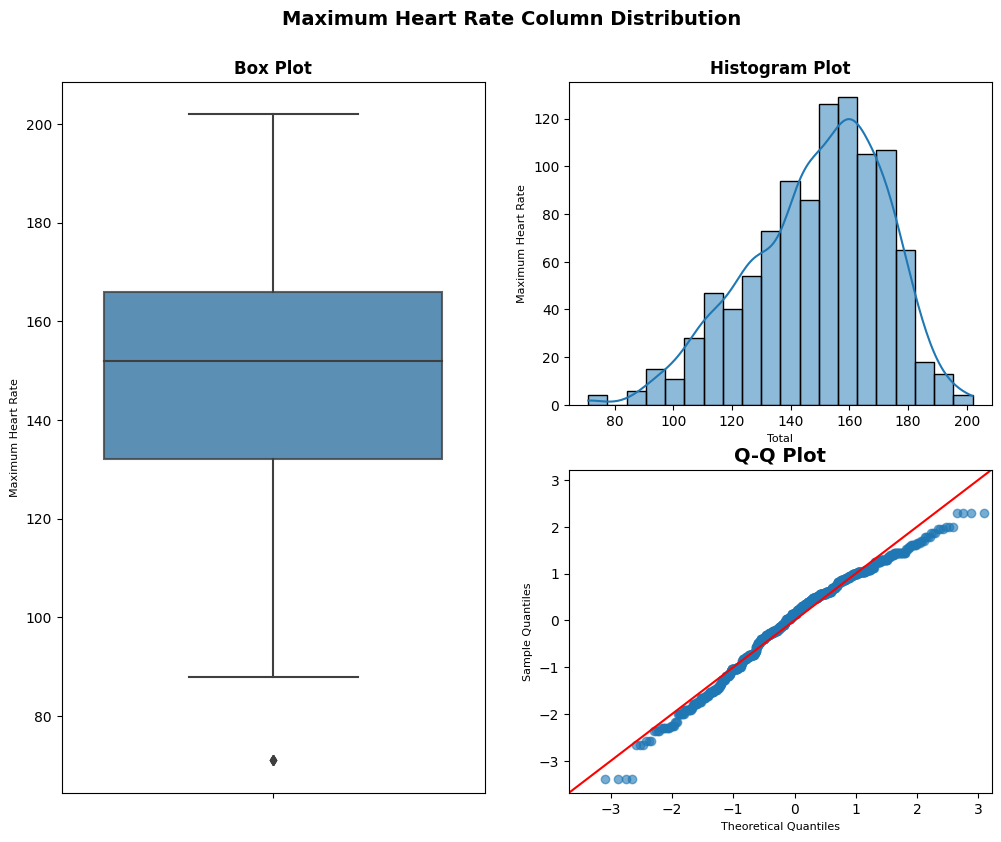

In [17]:
# Selected variable and plot size
selected_variable = 'thalach'
fig = plt.figure(figsize=(12, 9))

# Compute skewness and kurtosis
var_skewness = data[selected_variable].skew(axis=0, skipna=True)
var_kurtosis = data[selected_variable].kurt(axis=0, skipna=True)

# Print skewness and kurtosis
print('\033[1m'+'.: Maximum Heart Rate Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 50)
print(f'Skewness: \033[1m{var_skewness:.3f}')
print('\033[0m' + f'Kurtosis: \033[1m{var_kurtosis:.3f}\n')

# General Title
fig.suptitle('Maximum Heart Rate Column Distribution', fontweight='bold', 
             fontsize=14, fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# Histogram plot
ax_hist = fig.add_subplot(2, 2, 2)
ax_hist.set_title('Histogram Plot', fontweight='bold', fontsize=12, 
                  fontfamily='sans-serif')
sns.histplot(data=data, x=selected_variable, kde=True, ax=ax_hist)
ax_hist.set_xlabel('Total', fontweight='regular', fontsize=8, 
                   fontfamily='sans-serif')
ax_hist.set_ylabel('Maximum Heart Rate', fontweight='regular', fontsize=8,
                   fontfamily='sans-serif')

# Q-Q plot
ax_qq = fig.add_subplot(2, 2, 4)
ax_qq.set_title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
qqplot(data[selected_variable], fit=True, line='45', ax=ax_qq, alpha=0.6)
ax_qq.set_xlabel('Theoretical Quantiles', fontweight='regular', fontsize=8, 
                 fontfamily='sans-serif')
ax_qq.set_ylabel('Sample Quantiles', fontweight='regular', fontsize=8, 
                 fontfamily='sans-serif')

# Box plot
ax_box = fig.add_subplot(1, 2, 1)
ax_box.set_title('Box Plot', fontweight='bold', fontsize=12, 
                 fontfamily='sans-serif')
sns.boxplot(data=data, y=selected_variable, boxprops=dict(alpha=0.8), linewidth=1.5, ax=ax_box)
ax_box.set_ylabel('Maximum Heart Rate', fontweight='regular', fontsize=8, 
                  fontfamily='sans-serif')

plt.show()

.: "oldpeak" Column Skewness & Kurtosis :.
****************************************
Skewness: 1.209
Kurtosis: 1.302



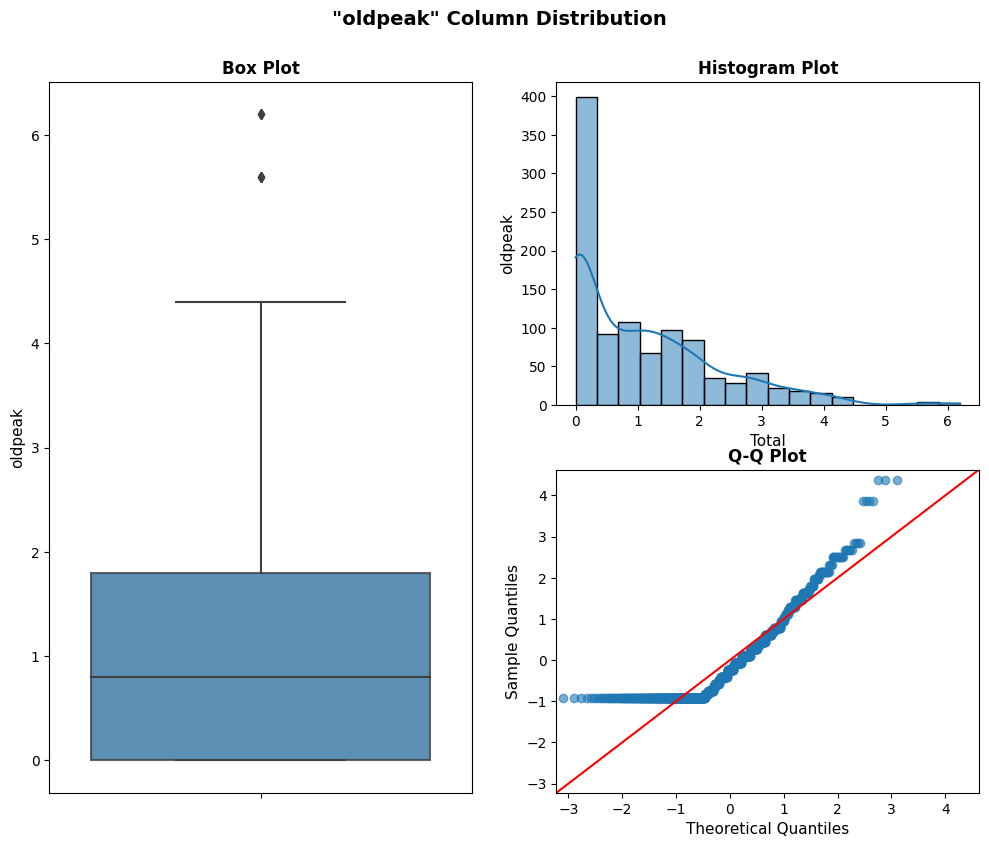

In [18]:
# Selected variable and color
selected_variable = 'oldpeak'

# Compute skewness and kurtosis
var_skewness = skew(data[selected_variable])
var_kurtosis = kurtosis(data[selected_variable])

# Print skewness and kurtosis
print('\033[1m'+'.: "oldpeak" Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print(f'Skewness: \033[1m{var_skewness:.3f}')
print('\033[0m' + f'Kurtosis: \033[1m{var_kurtosis:.3f}\n')

# Create figure
fig = plt.figure(figsize=(12, 9))
fig.suptitle('"oldpeak" Column Distribution', fontweight='bold', fontsize=14, fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# Histogram plot
ax_hist = fig.add_subplot(2, 2, 2)
ax_hist.set_title('Histogram Plot', fontweight='bold', fontsize=12, fontfamily='sans-serif')
sns.histplot(data=data, x=selected_variable, kde=True, ax=ax_hist)
ax_hist.set_xlabel('Total', fontweight='regular', fontsize=11, fontfamily='sans-serif')
ax_hist.set_ylabel('oldpeak', fontweight='regular', fontsize=11, fontfamily='sans-serif')

# Q-Q plot
ax_qq = fig.add_subplot(2, 2, 4)
ax_qq.set_title('Q-Q Plot', fontweight='bold', fontsize=12, fontfamily='sans-serif')
qqplot(data[selected_variable], fit=True, line='45', ax=ax_qq, alpha=0.6)
ax_qq.set_xlabel('Theoretical Quantiles', fontweight='regular', fontsize=11, fontfamily='sans-serif')
ax_qq.set_ylabel('Sample Quantiles', fontweight='regular', fontsize=11, fontfamily='sans-serif')

# Box plot
ax_box = fig.add_subplot(1, 2, 1)
ax_box.set_title('Box Plot', fontweight='bold', fontsize=12, fontfamily='sans-serif')
sns.boxplot(data=data, y=selected_variable, boxprops=dict(alpha=0.8), linewidth=1.5, ax=ax_box)
ax_box.set_ylabel('oldpeak', fontweight='regular', fontsize=11, fontfamily='sans-serif')

plt.show()

<Axes: >

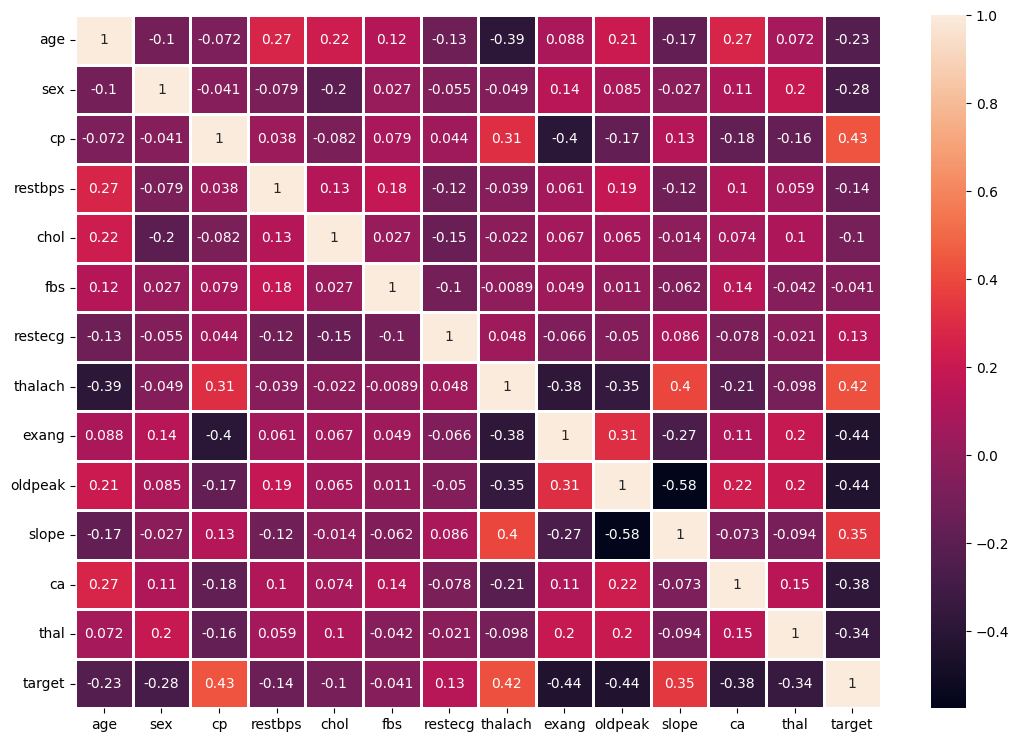

In [19]:
# EDA to get more insights from data
# Heatmap

correlations = data.corr(method='pearson')
# print(correlations)
plt.figure(figsize= (13,9))
sns.heatmap(correlations, linewidth=1,annot=True,linecolor='white')

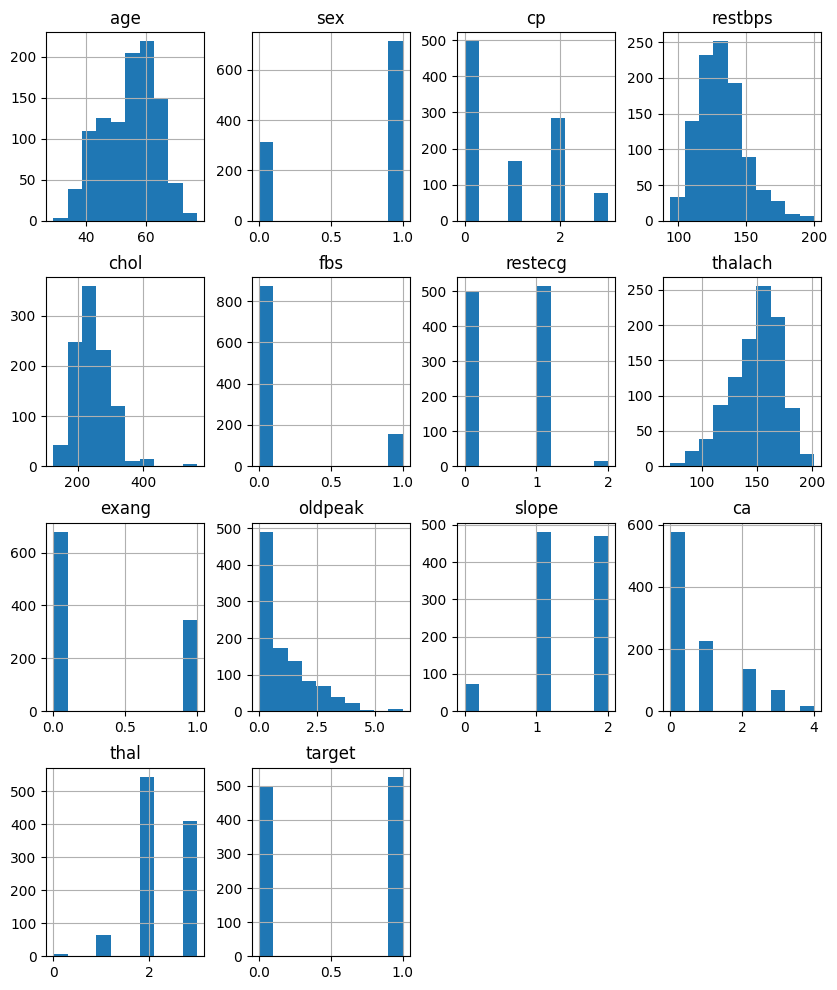

In [20]:
data.hist(figsize=(10, 12))
plt.show()

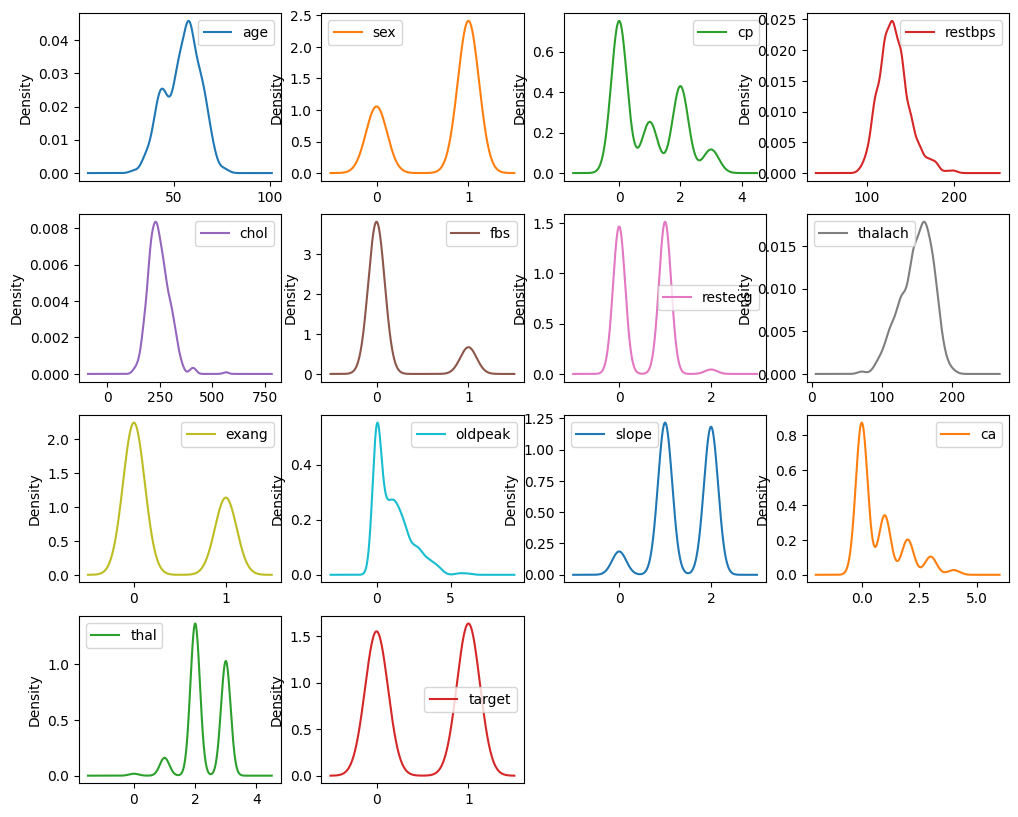

In [21]:
data.plot(kind='density', subplots=True, layout=(4, 4), figsize=(12, 10), sharex=False)
plt.show()

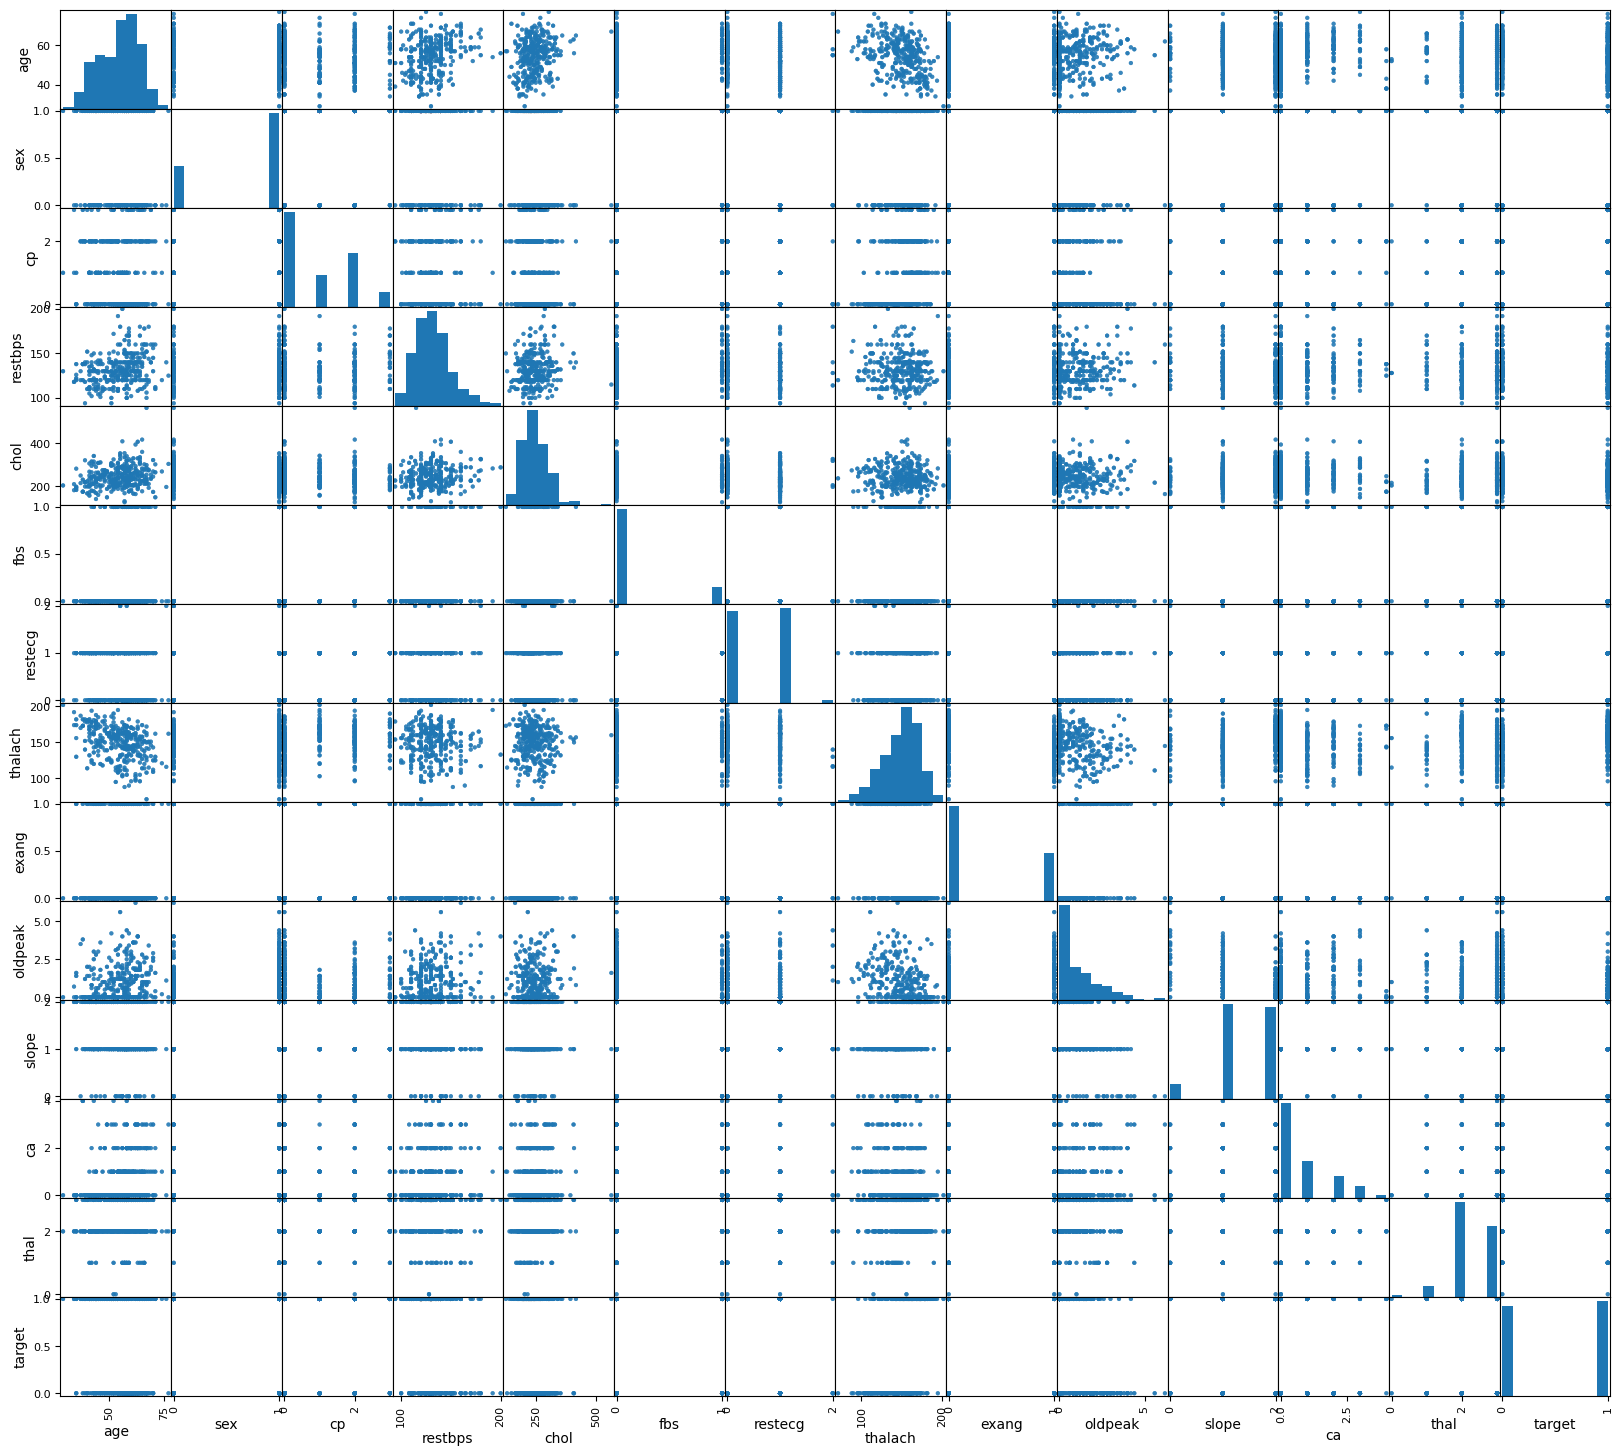

In [22]:
pd.plotting.scatter_matrix(data, figsize=(20, 18))
plt.show()

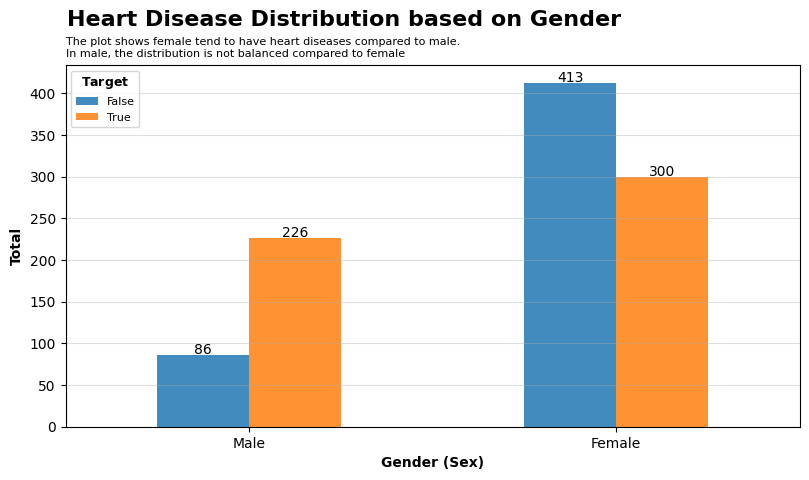

In [23]:
# Heart Disease Distribution based on Gender

# Labels Settings
target_labels = ['False', 'True']
gender_labels = np.array([0, 1])
gender_labels2 = ['Male', 'Female']

# Creating Bar Chart
ax_bar = pd.crosstab(data.sex, data.target).plot(kind='bar', figsize=(8, 5), alpha=0.85)

# Bar Chart Settings
for rect in ax_bar.patches:
    ax_bar.text(rect.get_x() + rect.get_width() / 2, 
            rect.get_height() + 1.25, rect.get_height(), 
            horizontalalignment='center', fontsize=10)

plt.suptitle('Heart Disease Distribution based on Gender', fontweight='heavy', 
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')

plt.title('The plot shows female tend to have heart diseases compared to male. \nIn male, the distribution is not balanced compared to female', 
          fontsize='8', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold')

plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')

plt.xticks(gender_labels, gender_labels2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=target_labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True)


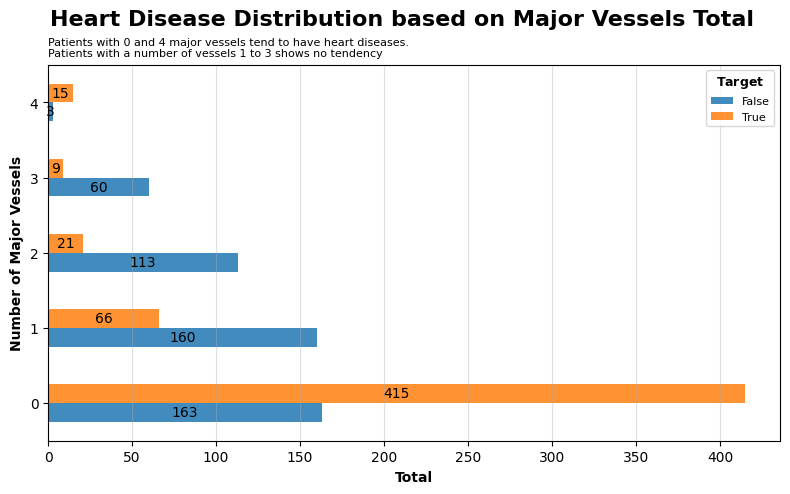

In [24]:
# Heart Disease Distribution based on Major Vessels Total

# Labels Settings
target_labels = ['False', 'True']

# Creating Horizontal Bar Chart
ax_bar = pd.crosstab(data.ca, data.target).plot(kind='barh', figsize=(8, 5), alpha=0.85)

# Horizontal Bar Chart Settings
for rect in ax_bar.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax_bar.text(x + width / 2, y + height / 2, '{:.0f}'.format(width), 
            horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Major Vessels Total', 
             fontweight='heavy', x=0.069, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif')
plt.title('Patients with 0 and 4 major vessels tend to have heart diseases. \nPatients with a number of vessels 1 to 3 shows no tendency', 
          fontsize='8', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Number of Major Vessels', fontfamily='sans-serif', fontweight='bold')
plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)
plt.legend(labels=target_labels, title='$\\bf{Target}$', fontsize='8', frameon=True,
           title_fontsize='9', loc='upper right')


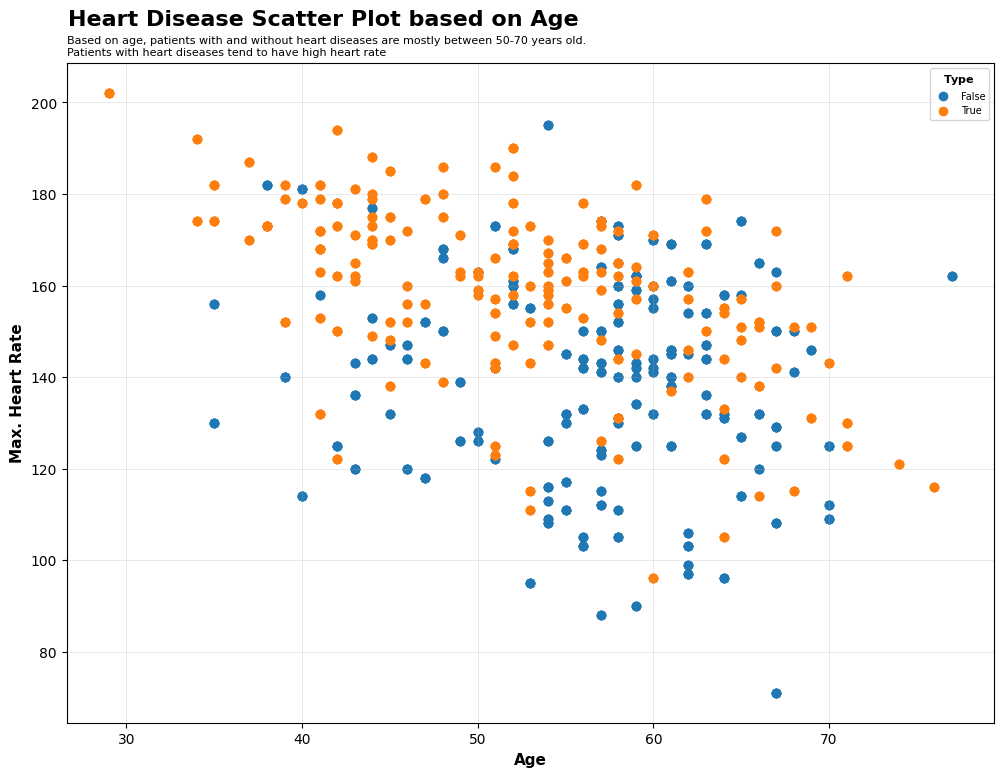

In [25]:
# Heart Disease Scatter Plot based on Age

# Scatter Plot Size & Titles Settings
plt.figure(figsize=(10, 8))
plt.suptitle('Heart Disease Scatter Plot based on Age', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')
plt.title('Based on age, patients with and without heart diseases are mostly between 50-70 years old. \nPatients with heart diseases tend to have high heart rate', 
          fontsize='8', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# Creating Scatter Plot
plt.scatter(x=data.age[data.target == 0], y=data.thalach[data.target == 0])
plt.scatter(x=data.age[data.target == 1], y=data.thalach[data.target == 1])

# Scatter Plot Legend & Labels Settings
plt.legend(['False', 'True'], title='$\\bf{Type}$', fontsize='7', 
           title_fontsize='8', loc='upper right', frameon=True)
plt.xlabel('Age', fontweight='bold', fontsize='11', fontfamily='sans-serif')
plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11', fontfamily='sans-serif')
plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show()

In [26]:
# Data Pre-processing method: Rescale method
# Using test_split method for evaluation

# load dataset
array = data.values
X = array[:, 0:len(data.columns)-1] # Exclude the last column
Y = array[:, -1] # Access the last column

# Rescaling Data
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

test_size = 0.33 # Test size
seed = 7 # For reproducibility

# Evaluation
# The dataset will be splitted into 80:20 ratio (80% training and 20% testing).
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX, Y, test_size=test_size, random_state=seed)

# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf', C=10, probability=True)))

for name, model in models:
    model.fit(X_train, Y_train)
    result = model.score(X_test, Y_test)
    print(f"Name: {name}, Accuracy: {result*100.0:.2f}%")

Name: LR, Accuracy: 85.55%
Name: LDA, Accuracy: 85.55%
Name: KNN, Accuracy: 85.84%
Name: NB, Accuracy: 82.89%
Name: SVM, Accuracy: 94.40%


In [27]:
# Without Data Pre-processing method
# Using test_split method: Split into Train and Test Sets

# load dataset
array = data.values
X = array[:, 0:len(data.columns)-1] # Exclude the last column
Y = array[:, -1] # Access the last column

test_size = 0.33 # Test size
seed = 7 # For reproducibility

# Evaluation
# The dataset will be splitted into 80:20 ratio (80% training and 20% testing).
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC(kernel='rbf', C=10, probability=True))) 72,5%
models.append(('SVM', SVC()))

for name, model in models:
    model.fit(X_train, Y_train)
    result = model.score(X_test, Y_test)
    print(f"Name: {name}, Accuracy: {result*100.0:.2f}%")

Name: LR, Accuracy: 85.55%
Name: LDA, Accuracy: 85.55%
Name: KNN, Accuracy: 72.27%
Name: NB, Accuracy: 82.89%
Name: SVM, Accuracy: 71.09%


In [28]:
# Data Pre-processing: Standardize Data method
# Using test_split method for evaluation: Split into Train and Test Sets

# load dataset
array = data.values
X = array[:, 0:len(data.columns)-1] # Exclude the last column
Y = array[:, -1] # Access the last column

# Standardize Data
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

test_size = 0.33
seed = 7

# Evaluation
# The dataset will be splitted into 80:20 ratio (80% training and 20% testing).
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX, Y, test_size=test_size, random_state=seed)

# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf', C=10, probability=True)))

for name, model in models:
    model.fit(X_train, Y_train)
    result = model.score(X_test, Y_test)
    print(f"Name: {name}, Accuracy: {result*100.0:.2f}%")

Name: LR, Accuracy: 85.25%
Name: LDA, Accuracy: 85.55%
Name: KNN, Accuracy: 81.42%
Name: NB, Accuracy: 82.89%
Name: SVM, Accuracy: 96.17%


In [29]:
# Data Pre-processing: Standardize Data method
# Using test_split method for evaluation: Split into Train and Test Sets

# load dataset
array = data.values
X = array[:, 0:len(data.columns)-1] # Exclude the last column
Y = array[:, -1] # Access the last column

# Normalize Data
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

test_size = 0.33
seed = 7

# Evaluation
# The dataset will be splitted into 80:20 ratio (80% training and 20% testing).
X_train, X_test, Y_train, Y_test = train_test_split(normalizedX, Y, test_size=test_size, random_state=seed)

# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC(kernel='rbf', C=10, probability=True))) 71.68%
models.append(('SVM', SVC()))

for name, model in models:
    model.fit(X_train, Y_train)
    result = model.score(X_test, Y_test)
    print(f"Name: {name}, Accuracy: {result*100.0:.2f}%")

Name: LR, Accuracy: 68.44%
Name: LDA, Accuracy: 86.14%
Name: KNN, Accuracy: 77.29%
Name: NB, Accuracy: 81.42%
Name: SVM, Accuracy: 70.21%


In [30]:
# Data Pre-processing: Binarize Data method
# Using test_split method for evaluation: Split into Train and Test Sets

# load dataset
array = data.values
X = array[:, 0:len(data.columns)-1] # Exclude the last column
Y = array[:, -1] # Access the last column

# Binarize Data
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)

test_size = 0.33
seed = 7

# Evaluation
# The dataset will be splitted into 80:20 ratio (80% training and 20% testing).
X_train, X_test, Y_train, Y_test = train_test_split(binaryX, Y, test_size=test_size, random_state=seed)

# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC(kernel='rbf', C=10, probability=True))) 82.89%
models.append(('SVM', SVC()))

for name, model in models:
    model.fit(X_train, Y_train)
    result = model.score(X_test, Y_test)
    print(f"Name: {name}, Accuracy: {result*100.0:.2f}%")

Name: LR, Accuracy: 79.94%
Name: LDA, Accuracy: 79.94%
Name: KNN, Accuracy: 79.65%
Name: NB, Accuracy: 77.58%
Name: SVM, Accuracy: 82.30%


In [31]:
# Data Pre-processing method: Rescale method
# 
# Using KFold Evaluation

# load dataset
array = data.values
X = array[:, 0:len(data.columns)-1] # Exclude the last column
Y = array[:, -1] # Access the last column

# Rescaling Data
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf', C=10, probability=True)))

scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, rescaledX, Y, cv=kfold, scoring=scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.840967 (0.027561)
LDA: 0.829250 (0.027712)
KNN: 0.861432 (0.034595)
NB: 0.826309 (0.031826)
SVM: 0.954169 (0.024643)


In [32]:
# Data Pre-processing method: Binarize method
# Using KFold Evaluation

# load dataset
array = data.values
X = array[:, 0:len(data.columns)-1] # Exclude the last column
Y = array[:, -1] # Access the last column

# Binarize Data
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)

# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf', C=10, probability=True)))

scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, rescaledX, Y, cv=kfold, scoring=scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.840967 (0.027561)
LDA: 0.829250 (0.027712)
KNN: 0.861432 (0.034595)
NB: 0.826309 (0.031826)
SVM: 0.954169 (0.024643)


In [33]:
# Data Pre-processing method: Binarize method
# Using KFold Evaluation

# load dataset
array = data.values
X = array[:, 0:len(data.columns)-1] # Exclude the last column
Y = array[:, -1] # Access the last column

# Normalize Data
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf', C=10, probability=True)))

scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, rescaledX, Y, cv=kfold, scoring=scoring)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.840967 (0.027561)
LDA: 0.829250 (0.027712)
KNN: 0.861432 (0.034595)
NB: 0.826309 (0.031826)
SVM: 0.954169 (0.024643)


In [34]:
# Model Implementation

#     MODELS TESTED
# 1. Logistic Regression
# 2. Naive Bayes
# 4. K-Nearest Neighbour
# 5. Decision Tree
# 6. Support Vector Machine

# We have decided to go with SVM because it provides the best accuracy result when 
# data is standardized using scikit-learn with the StandardScaler class

# Data Pre-processing: Standardize Data method
# Using test_split method for evaluation: Split into Train and Test Sets

# load dataset
array = data.values
X = array[:, 0:len(data.columns)-1] # Exclude the last column
Y = array[:, -1] # Access the last column

# Standardize Data
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

test_size = 0.33
seed = 7

# Evaluation
# The dataset will be splitted into 80:20 ratio (80% training and 20% testing).
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX, Y, test_size=test_size, random_state=seed)

# prepare models
model = SVC(kernel='rbf', C=10, probability=True)

model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print(f"Accuracy: {result*100.0:.2f}%")


Accuracy: 96.17%


In [35]:
# Confusion Matrix for Evaluating Prediction
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X = array[:, 0:len(data.columns)-1] # Exclude the last column
Y = array[:, -1] # Access the last column

# Standardize Data
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

test_size = 0.33
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(rescaledX, Y, test_size=test_size, random_state=seed)

# prepare models
model = SVC(kernel='rbf', C=10, probability=True)

model.fit(X_train, Y_train)

predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)

#             Predicted 0    Predicted 1
# Actual 0       TN              FP
# Actual 1       FN              TP

# Print confusion matrix with headings
print("Confusion Matrix:")
print("              Predicted 0    Predicted 1")
print(f"Actual 0      {matrix[0][0]:<10}     {matrix[0][1]:<10}")
print(f"Actual 1      {matrix[1][0]:<10}     {matrix[1][1]:<10}")


# Majority of the redictions fall on the diagonal line of the matrix (which are correct predictions) 
# based on the TP and TN map above.

# True Negative (TN): 153
# False Positive (FP): 3
# False Negative (FN): 10
# True Positive (TP): 173
# This indicates that the model made relatively few errors in its predictions:

# It correctly classified 153 instances as Negative (Actual 0, Predicted 0).
# It correctly classified 173 instances as Positive (Actual 1, Predicted 1).
# It incorrectly classified 3 instances as Positive when they were actually Negative (False Positives).
# It incorrectly classified 10 instances as Negative when they were actually Positive (False Negatives).
# Overall, the model seems to have performed well, with a majority of correct predictions.

Confusion Matrix:
              Predicted 0    Predicted 1
Actual 0      153            3         
Actual 1      10             173       
